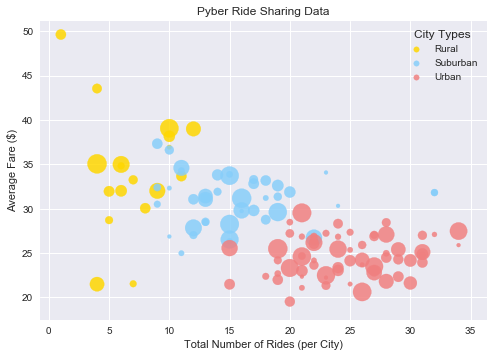

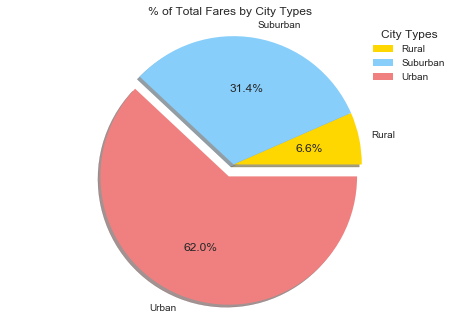

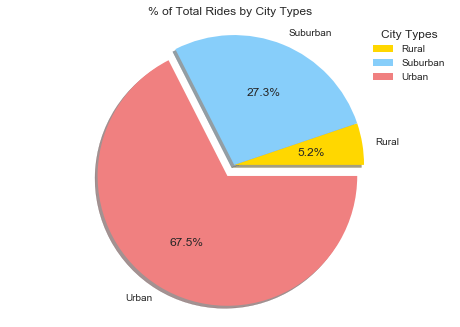

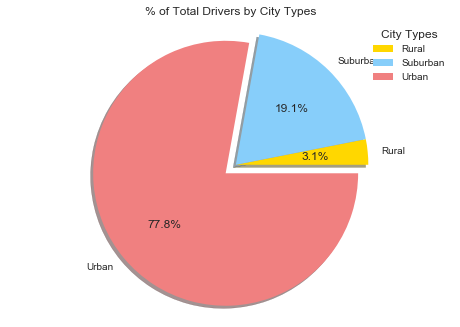

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ride_pd = pd.read_csv('ride_data.csv')
ride_pd = ride_pd.sort_values('city')

city_pd = pd.read_csv('city_data.csv')
city_pd = city_pd.sort_values('city')

ride_group = ride_pd.groupby('city').agg({'city':'count', 'fare': 'sum'})
ride_group = ride_group.rename(columns={'city': 'ride_count', 'fare': 'total_fare'})
ride_group['avg_fare'] = ''

for index, row in ride_group.iterrows():
    ride_group['avg_fare'] = ride_group['total_fare']/ride_group['ride_count']

ride_group = ride_group.reset_index()

cityride_pd = pd.merge(ride_group,city_pd,on='city',how='left')

fig = plt.figure()
ax = fig.add_subplot(111)
sns.set_style('darkgrid')

ax.set_title('Pyber Ride Sharing Data')
ax.set_xlabel('Total Number of Rides (per City)')
ax.set_ylabel('Average Fare ($)')

plt.scatter(cityride_pd['ride_count'][cityride_pd['type']=='Rural'],cityride_pd['avg_fare'][cityride_pd['type']=='Rural'],s=cityride_pd.driver_count*5,label='Rural',color='gold',alpha=.85)
plt.scatter(cityride_pd['ride_count'][cityride_pd['type']=='Suburban'],cityride_pd['avg_fare'][cityride_pd['type']=='Suburban'],s=cityride_pd.driver_count*5,label='Suburban',color='lightskyblue',alpha=.85)
plt.scatter(cityride_pd['ride_count'][cityride_pd['type']=='Urban'],cityride_pd['avg_fare'][cityride_pd['type']=='Urban'],s=cityride_pd.driver_count*5,label='Urban',color='lightcoral',alpha=.85)
lgnd = plt.legend(fontsize='small', mode='Expanded', numpoints=1, scatterpoints=1, loc='best', title='City Types', labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

city_pie = cityride_pd.groupby(['type']).sum()
city_pie = city_pie.reset_index()

fig = plt.figure()
ax1 = fig.add_subplot(111)

labels = city_pie['type']
sizes = city_pie['total_fare']
colors = ['gold','lightskyblue','lightcoral']
explode = (0,0,0.1)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=0)
ax1.set_title('% of Total Fares by City Types')
plt.axis('equal')
lgnd = plt.legend(fontsize='small', mode='Expanded', numpoints=1, scatterpoints=1, loc='best', title='City Types', labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(111)

labels = city_pie['type']
sizes = city_pie['ride_count']
colors = ['gold','lightskyblue','lightcoral']
explode = (0,0,0.1)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=0)
ax2.set_title('% of Total Rides by City Types')
plt.axis('equal')
lgnd = plt.legend(fontsize='small', mode='Expanded', numpoints=1, scatterpoints=1, loc='best', title='City Types', labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()

fig = plt.figure()
ax3 = fig.add_subplot(111)

labels = city_pie['type']
sizes = city_pie['driver_count']
colors = ['gold','lightskyblue','lightcoral']
explode = (0,0,0.1)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=0)
ax3.set_title('% of Total Drivers by City Types')
plt.axis('equal')
lgnd = plt.legend(fontsize='small', mode='Expanded', numpoints=1, scatterpoints=1, loc='best', title='City Types', labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()